# **VesselBoost Toolbox**
## Module 1 - predict
VesselBoost provides a prediction module, which allows you to use our pre-trained models to segment your data. 

### Pre-trained models
We currently provide 3 pre-trained models (manual, om1, and om2) on Open Science Framework, which you can easily download by running the following cell:

In [4]:
import os
os.mkdir('./../saved_models/')
os.chdir('./../saved_models/')

!osf -p abk4p fetch /pretrained_models/manual_0429 ./manual_0429
# !osf -p abk4p fetch /pretrained_models/omelette1_0429 ./omelette1_0429
# !osf -p abk4p fetch /pretrained_models/omelette2_0429 ./omelette2_0429

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 33.7Mbytes/s]


To illustrate the usage of our toolbox, we will download a public MRA dataset next:

In [5]:
# Download the data
!mkdir ./../data/img/
!osf -p nr6gc fetch /osfstorage/twoEchoTOF/withSkull/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii ./../data/img/GRE_400um.nii

100%|████████████████████████████████████| 164M/164M [00:04<00:00, 36.3Mbytes/s]


### Predict without preprocessing 
If you don't want to preprocess your data following our pipeline (N4 bias field correction, denoising), just set the argument *--prep_mode* to 4:

In [9]:
!mkdir -p ./../saved_imgs/generated_label/
!python ./../prediction.py --ds_path ./../data/img/ --out_path ./../saved_imgs/generated_label/ --pretrained ./../saved_models/manual_0429 --prep_mode 4

Prediction session will start shortly..
Aborting the preprocessing procedure!

Running with CPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [00:46<00:00,  7.82s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_400um.nii is successfully saved!

Output MIP image GRE_400um.nii is successfully saved!

Prediction and thresholding procedure end!



VesselBoost will generate both a *nifti* file of the segmentation (.nii/.nii.gz) and a maximum intensity projection image (.jpg) as shown below:

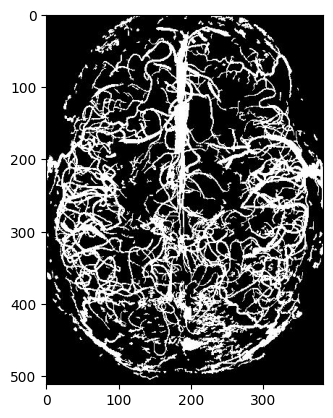

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../saved_imgs/generated_label/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

### Predict with preprocessing

If you require preprocessing, there are three options:
 - Set prep_mode to 1 for N4 bias field correction only;
 - Set prep_mode to 2 for denoising only;
 - Set prep_mode to 3 for both. 
 
In any of those settings, you also have to set a path to store the preprocessed images as in the following:

In [12]:
!mkdir -p ./../data/preprocessed/
!mkdir -p ./../saved_imgs/generated_label_2/
!python ./../prediction.py --ds_path ./../data/img/ --ps_path ./../data/preprocessed/ --out_path ./../saved_imgs/generated_label_2/ --pretrained ./../saved_models/manual_0429 --prep_mode 1

Prediction session will start shortly..
The preprocessing procedure is starting!

100%|█████████████████████████████████████████████| 1/1 [01:34<00:00, 94.02s/it]
All processed images are successfully saved!
Running with CPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [00:49<00:00,  8.23s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_400um.nii is successfully saved!

Output MIP image GRE_400um.nii is successfully saved!

Prediction and thresholding procedure end!



And here is the MIP image:

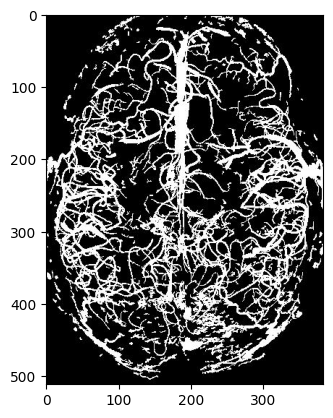

In [14]:
mip_image = img.imread("./../saved_imgs/generated_label_2/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')